In [96]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6427031 .csv')
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6486029.csv')
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6607011.csv')
df = pd.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/logs.csv')

/Users/wiggles/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Our goal is to find a weak spot in the game that would expl

In [5]:
dfByPlayer = []
for i in set(df['player_id']):
    dfByPlayer.append(df[df['player_id'] == i])



In [7]:
wordchoice = []
for i in dfByPlayer:
    wordchoice.append(set(i['old_label']))

In [8]:
w = []
for i in wordchoice:
    w.append([x for x in i if type(x) == str])

In [10]:
for i in w:
    print(i)

['my cousin', 'happy', 'driving around', 'bike riding', 'family']
[]
['be a polec', 'nice car', 'my dad']
['cookie', 'math', 'engeneer', 'constru']
['L.A', 'caring', 'florida', 'love music', 'football', 'New York', 'some where fun', 'hyper', 'gaming', 'reading', 'toyotas']
[]
[]
['funny']
['cooking']
[]
[]
[]
[]
[]
['weird']
['careing person', 'nice', 'being smart', 'fun yo be arou', 'get that weigh']
['amusement park', 'electronics', 'animals', 'games']
['flordia', 'tired']
['excersise', 'yorkie']
['sad']
[]
['i love shoes', 'my niece', 'fruits', 'huskey', 'music', 'the ocean', 'cosmatoligest', 'arts', 'this car', 'food', 'on flat land', 'artist', 'photagraphy']
[]
['dog', 'happy', 'animals']
['colors', 'cool']
['nerologists', 'family', 'fashion', 'dua', 'amazing', 'quran']
['js40', 'good', 'tty', 'food', 'agol', 'lol', 'jose', '12131415161718', 'fuck bitch', 'fuck', 'game', 'bitch', 'cool', 'kill', 'i', 'salsiiiiiiiiii', 'car', '21', 'bitc', 'fune', 'flrofi b mckck']
['one kid', 'coo

In [19]:
mask = []
for i in w:
    if len(i) == 0:
        mask.append(False)
    else:
        mask.append(True)
    

In [20]:
mask

[True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 T

In [21]:
caregroup = []
notcaregroup = []
for i in range(len(mask)):
    if(mask[i] == True):
        caregroup.append(dfByPlayer[i])
    else:
        notcaregroup.append(dfByPlayer[i])

In [22]:
len(caregroup)

121

In [23]:
len(notcaregroup)

45

In [31]:
totaltime = 0
for i in caregroup:
    totaltime += i['event_time_dbl'].max()
print(totaltime/len(caregroup))

198150.81818181818


In [32]:
totaltime = 0
for i in notcaregroup:
    totaltime += i['event_time_dbl'].max()
print(totaltime/len(notcaregroup))

209179.93333333332


In [105]:
totalminigametimelist = []
for i in notcaregroup:
    startflag = False
    start = 0
    stop = 0
    totalminigametime = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Knowledge Minigame") or (row['event_category'] == "Minigame General")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Knowledge Minigame") and (row['event_category'] != "Minigame General")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime/(i['event_time_dbl'].max()))


(array([ 7.,  6., 18., 10.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.        , 0.0981789 , 0.19635781, 0.29453671, 0.39271562,
        0.49089452, 0.58907343, 0.68725233, 0.78543124, 0.88361014,
        0.98178904]),
 <BarContainer object of 10 artists>)

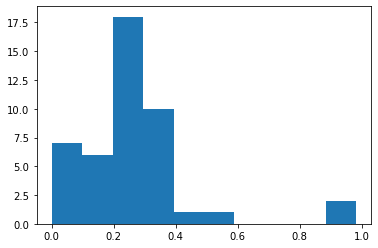

In [106]:
plt.hist(totalminigametimelist)


In [107]:
totalminigametimelist = []
for i in caregroup:
    totalminigametime = 0
    startflag = False
    start = 0
    stop = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Knowledge Minigame") or (row['event_category'] == "Minigame General")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Knowledge Minigame") and (row['event_category'] != "Minigame General")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime/(i['event_time_dbl'].max()))


(array([21., 15., 67., 10.,  3.,  1.,  0.,  0.,  2.,  2.]),
 array([0.00224251, 0.10082217, 0.19940183, 0.2979815 , 0.39656116,
        0.49514082, 0.59372049, 0.69230015, 0.79087981, 0.88945948,
        0.98803914]),
 <BarContainer object of 10 artists>)

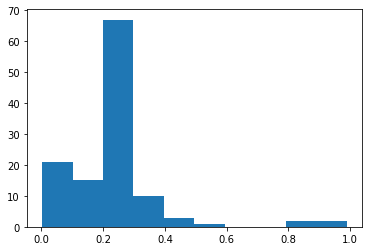

In [108]:
plt.hist(totalminigametimelist)


In [ ]:
graph = []
for i in notcaregroup:
